In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [91]:
filename1 = 'benin-malanville.csv'
filename2 = 'sierraleone-bumbuna.csv'
filename3 = 'benin-malanville.csv'
#load data
df1 = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)
df3=  pd.read_csv(filename3)
# Combine the datasets
dfs = [df1, df2, df3]
df = pd.concat(dfs, ignore_index=True)

In [68]:
print(df.columns)
print(df.dtypes)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [92]:
# Convert the index to a DatetimeIndex
df = df1.set_index('Timestamp')
df1.index = pd.to_datetime(df1.index)

In [51]:
df.head(10)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:06:00,0.0,0.0,0.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:07:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
2021-08-09 00:08:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
2021-08-09 00:09:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print()

Missing values:
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
dtype: int64



In [52]:
# Check for negative values in columns that should be positive
print("Negative values in columns that should be positive:")
positive_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB',]
for col in positive_cols:
    if (df1[col] < 0).any():
        print(f"Negative values found in column '{col}'")
print()

Negative values in columns that should be positive:



In [53]:
print("Negative values in columns that should be positive:")
positive_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
for col in positive_cols:
    if (df1[col] < 0).any():
        print(f"Negative values found in column '{col}'")
print()

Negative values in columns that should be positive:



In [ ]:
this of cloumn always should all be positive so we must clean the data

In [19]:
# Check for negative values in GHI, DNI, and DHI columns
print("Negative values in columns:")
for col in ['GHI', 'DNI', 'DHI']:
    print(f"{col}: {df1[df1[col] < 0][col].count()} negative values")

Negative values in columns:
GHI: 0 negative values
DNI: 0 negative values
DHI: 0 negative values


In [18]:
# Handle negative values (e.g., replace with NaN, interpolate, or remove)
df1['GHI'] = df1['GHI'].clip(lower=0)
df1['DNI'] = df1['DNI'].clip(lower=0)
df1['DHI'] = df1['DHI'].clip(lower=0)

In [23]:
# Identify columns with extreme values and high variability
extreme_cols = []
high_std_cols = []
for col in ['ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'Precipitation', 'TModA', 'TModB', 'Comments']:
    col_min = df1[col].min()
    col_max = df1[col].max()
    col_std = df1[col].std()
    col_mean = df1[col].mean()
    if col_min < (col_mean - 3 * col_std) or col_max > (col_mean + 3 * col_std):
        extreme_cols.append(col)
    if col_std > 0.2 * col_mean:
        high_std_cols.append(col)

print("\nColumns with extreme values:")
print(", ".join(extreme_cols))
print("\nColumns with high standard deviation:")
print(", ".join(high_std_cols))


Columns with extreme values:
ModA, ModB, WS, WSgust, WSstdev, WDstdev, Precipitation, TModA, TModB

Columns with high standard deviation:
ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, Precipitation, TModA, TModB


In [25]:
# Handle extreme values and high variability (e.g., winsorization, outlier removal)
for col in extreme_cols + high_std_cols:
    q1 = df1[col].quantile(0.01)
    q3 = df1[col].quantile(0.99)
    df1[col] = df1[col].clip(lower=q1, upper=q3)


In [29]:
# Identify columns with non-normal distributions
skew_cols = []
kurtosis_cols = []
for col in ['ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD', 'Precipitation', 'TModA', 'TModB', 'Comments']:
    col_skew = skew(df1[col])
    col_kurtosis = kurtosis(df1[col])
    if abs(col_skew) > 1 or abs(col_kurtosis) > 3:
        skew_cols.append(col)
        kurtosis_cols.append(col)

print("\nColumns with high skewness:")
print(", ".join(skew_cols))
print("\nColumns with high kurtosis:")
print(", ".join(kurtosis_cols))



Columns with high skewness:
ModA, ModB, Precipitation

Columns with high kurtosis:
ModA, ModB, Precipitation


In [30]:
# Apply data transformations to normalize the distributions (e.g., log, square root, Box-Cox)
for col in skew_cols + kurtosis_cols:
    df1[col] = np.log1p(df1[col])

In [31]:
# Handle missing values (e.g., imputation, exclusion)
missing_cols = df.isnull().sum()
print("\nColumns with missing values:")
print(missing_cols[missing_cols > 0])


Columns with missing values:
Comments    1576800
dtype: int64


In [32]:
# Impute missing values (e.g., mean/median imputation, regression imputation)
df1 = df1.fillna(df1.mean())

In [33]:
for column in df1.select_dtypes(include=np.number).columns:
    print(f"Statistics for column '{column}':")
    print(f"Mean: {df1[column].mean():.2f}")
    print(f"Median: {df1[column].median():.2f}")
    print(f"Standard Deviation: {df1[column].std():.2f}")
    print(f"Minimum: {df1[column].min():.2f}")
    print(f"Maximum: {df1[column].max():.2f}")
    print(f"Skewness: {df1[column].skew():.2f}")
    print(f"Kurtosis: {df1[column].kurt():.2f}")
    print()

Statistics for column 'GHI':
Mean: 229.44
Median: 1.10
Standard Deviation: 319.87
Minimum: 0.00
Maximum: 1499.00
Skewness: 1.12
Kurtosis: -0.18

Statistics for column 'DNI':
Mean: 150.47
Median: 0.00
Standard Deviation: 249.21
Minimum: 0.00
Maximum: 952.30
Skewness: 1.44
Kurtosis: 0.63

Statistics for column 'DHI':
Mean: 116.75
Median: 0.80
Standard Deviation: 157.32
Minimum: 0.00
Maximum: 892.00
Skewness: 1.20
Kurtosis: 0.45

Statistics for column 'ModA':
Mean: 0.95
Median: 0.97
Standard Deviation: 0.94
Minimum: 0.00
Maximum: 2.07
Skewness: 0.04
Kurtosis: -1.91

Statistics for column 'ModB':
Mean: 0.95
Median: 0.96
Standard Deviation: 0.94
Minimum: 0.00
Maximum: 2.06
Skewness: 0.05
Kurtosis: -1.91

Statistics for column 'Tamb':
Mean: 27.56
Median: 27.10
Standard Deviation: 5.48
Minimum: 15.70
Maximum: 40.20
Skewness: 0.20
Kurtosis: -0.47

Statistics for column 'RH':
Mean: 62.82
Median: 67.70
Standard Deviation: 28.33
Minimum: 8.00
Maximum: 100.00
Skewness: -0.37
Kurtosis: -1.16

Stati

C:\Users\Melat\.conda\envs\week0\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [41]:
# Check for outliers in sensor readings and wind speed data
sensor_cols = ['ModA', 'ModB']
wind_cols = ['WS', 'WSgust']

print("Outliers in sensor readings:")
for col in sensor_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers found in column '{col}': {outliers.tolist()}")
print()


Outliers in sensor readings:



In [40]:
print("Outliers in wind speed data:")
for col in wind_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers found in column '{col}': {outliers.tolist()}")
print()

Outliers in wind speed data:
Outliers found in column 'WS': [6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2,

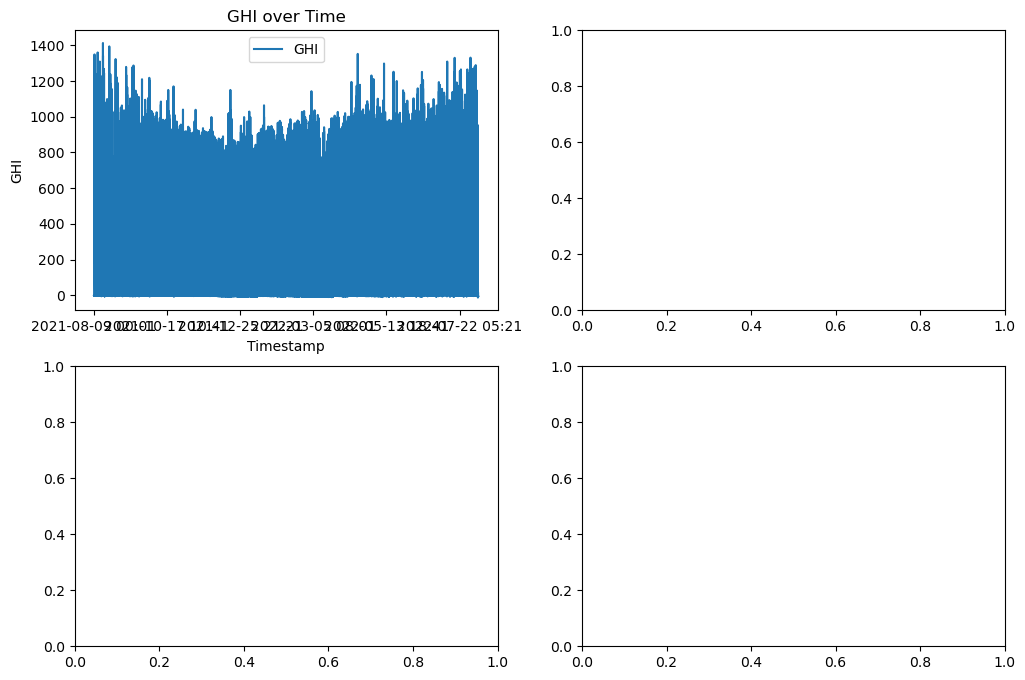

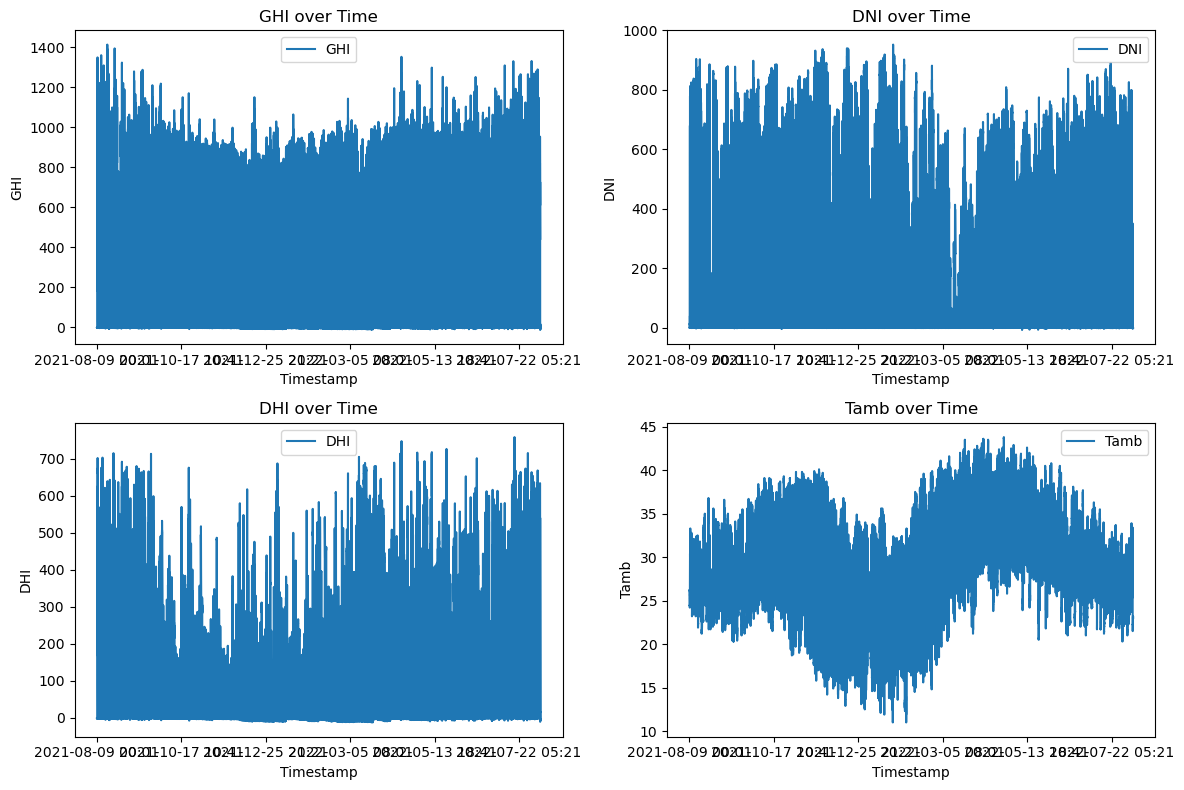

In [ ]:
# Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# GHI over time
ax = axes[0, 0]
df1.plot(x='Timestamp', y='GHI', ax=ax, kind='line')
ax.set_title('GHI over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('GHI')
# Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# GHI over time
ax = axes[0, 0]
df1.plot(x='Timestamp', y='GHI', ax=ax, kind='line')
ax.set_title('GHI over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('GHI')

# DNI over time
ax = axes[0, 1]
df1.plot(x='Timestamp', y='DNI', ax=ax, kind='line')
ax.set_title('DNI over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('DNI')

# DHI over time
ax = axes[1, 0]
df1.plot(x='Timestamp', y='DHI', ax=ax, kind='line')
ax.set_title('DHI over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('DHI')

# Tamb over time
ax = axes[1, 1]
df1.plot(x='Timestamp', y='Tamb', ax=ax, kind='line')
ax.set_title('Tamb over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tamb')

plt.tight_layout()
plt.show()

# Evaluate the impact of cleaning on sensor readings
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# ModA over time, with cleaning status
ax = axes[0]
df1.plot(x='Timestamp', y='ModA', ax=ax, kind='line', color='blue', label='ModA')
df1.plot(x='Timestamp', y='Cleaning', ax=ax, kind='scatter', color='red', label='Cleaning')
ax.set_title('ModA over Time, with Cleaning Status')
ax.set_xlabel('Time')
ax.set_ylabel('ModA')
ax.legend()


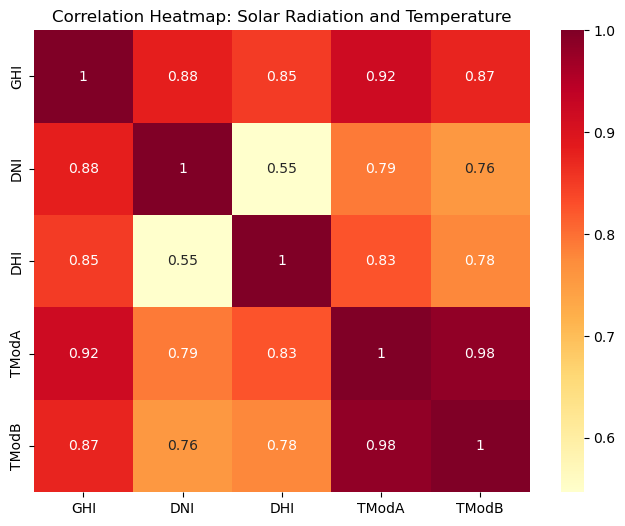

<Figure size 1200x800 with 0 Axes>

KeyboardInterrupt: 

In [81]:
# Correlation heatmap for solar radiation and temperature measures
corr_matrix = df1[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap: Solar Radiation and Temperature')
plt.show()
# Pair plot for solar radiation and temperature measures
plt.figure(figsize=(12, 8))
sns.pairplot(df1[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.title('Pair Plot: Solar Radiation and Temperature')
plt.show()

# Scatter matrix for wind conditions and solar irradiance
plt.figure(figsize=(12, 8))
sns.scatterplot(x='WS', y='GHI', data=df1, label='WS')
sns.scatterplot(x='WSgust', y='GHI', data=df, label='WSgust')
sns.scatterplot(x='WD', y='GHI', data=df1, label='WD')
plt.xlabel('Wind Conditions')
plt.ylabel('GHI')
plt.title('Scatter Matrix: Wind Conditions and Solar Irradiance')
plt.legend()
plt.show()

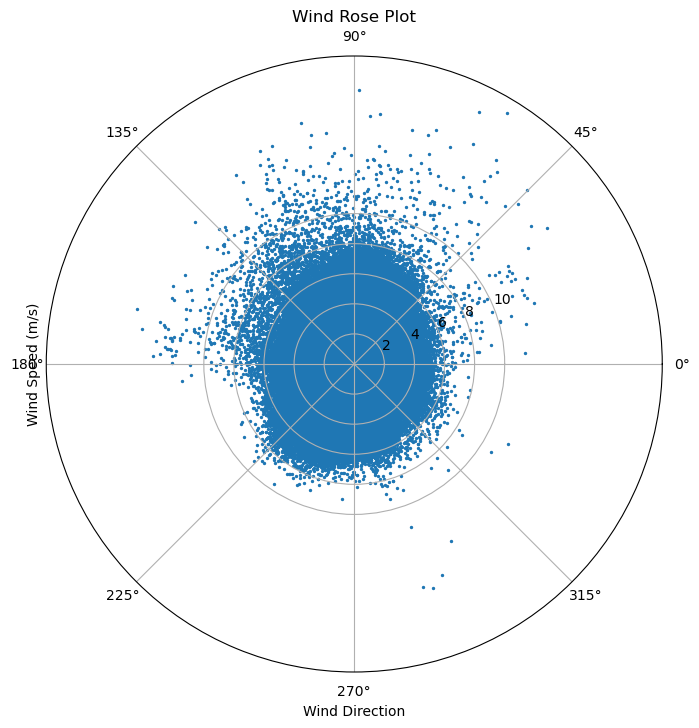

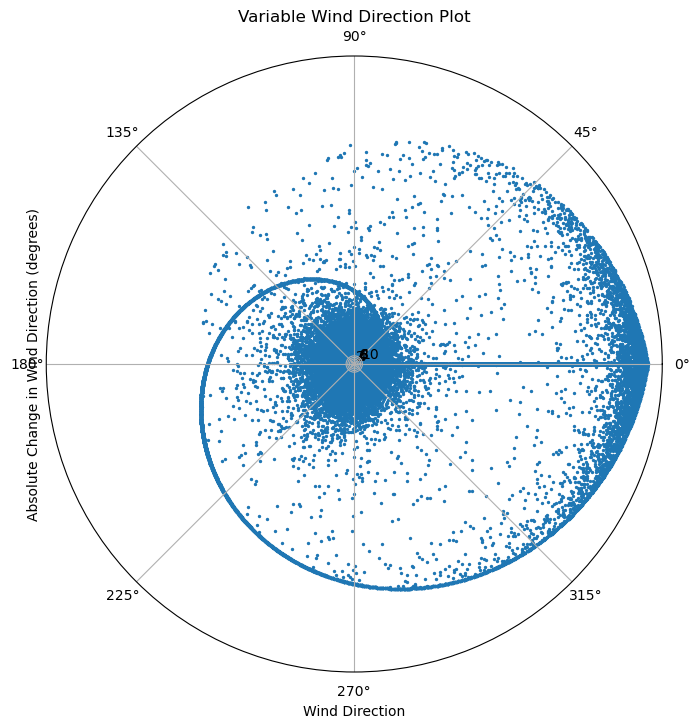

In [83]:
# Create the wind rose plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection='polar')
theta = np.deg2rad(df1['WD'])
radii = df1['WS']
ax.scatter(theta, radii, s=2)
ax.set_thetagrids(np.linspace(0, 360, 8, endpoint=False))
ax.set_rgrids(np.arange(2, 11, 2))
plt.title('Wind Rose Plot')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (m/s)')
plt.show()

# Create the variable wind direction plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection='polar')
theta = np.deg2rad(df1['WD'])
radii = df1['WD'].diff().abs()
ax.scatter(theta, radii, s=2)
ax.set_thetagrids(np.linspace(0, 360, 8, endpoint=False))
ax.set_rgrids(np.arange(2, 11, 2))
plt.title('Variable Wind Direction Plot')
plt.xlabel('Wind Direction')
plt.ylabel('Absolute Change in Wind Direction (degrees)')
plt.show()

Correlation Matrix:
          Tamb        RH       GHI       DNI       DHI
Tamb  1.000000 -0.414842  0.547513  0.467584  0.503925
RH   -0.414842  1.000000 -0.360029 -0.373475 -0.285018
GHI   0.547513 -0.360029  1.000000  0.882376  0.849989
DNI   0.467584 -0.373475  0.882376  1.000000  0.546602
DHI   0.503925 -0.285018  0.849989  0.546602  1.000000


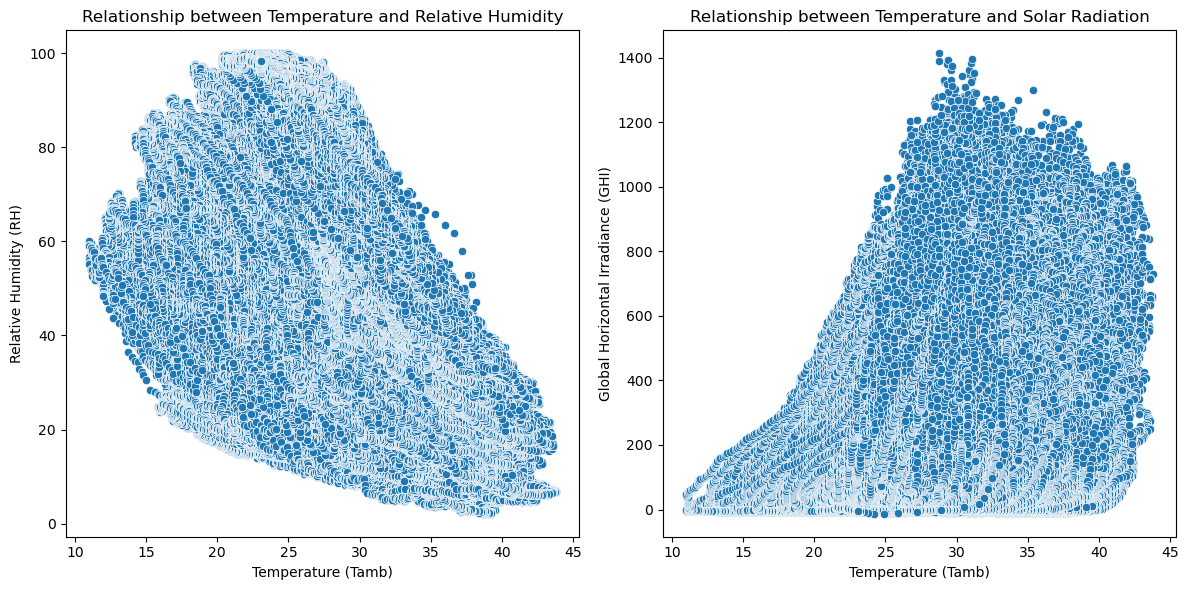


Monthly Correlation Matrix:
                     Tamb        RH       GHI       DNI       DHI
Timestamp                                                        
2021-08-31 Tamb  1.000000 -0.937583  0.665754  0.567449  0.559173
           RH   -0.937583  1.000000 -0.740274 -0.597647 -0.657852
           GHI   0.665754 -0.740274  1.000000  0.829302  0.814017
           DNI   0.567449 -0.597647  0.829302  1.000000  0.384157
           DHI   0.559173 -0.657852  0.814017  0.384157  1.000000
2021-09-30 Tamb  1.000000 -0.911631  0.649055  0.614788  0.537201
           RH   -0.911631  1.000000 -0.743882 -0.675225 -0.650830
           GHI   0.649055 -0.743882  1.000000  0.867198  0.850696
           DNI   0.614788 -0.675225  0.867198  1.000000  0.514663
           DHI   0.537201 -0.650830  0.850696  0.514663  1.000000
2021-10-31 Tamb  1.000000 -0.937101  0.700764  0.701557  0.614424
           RH   -0.937101  1.000000 -0.678382 -0.695394 -0.585155
           GHI   0.700764 -0.678382  1.000000  

In [87]:
df1 = df1.set_index('Timestamp')
df1.index = pd.to_datetime(df1.index)
# Calculate the correlation matrix
corr_matrix = df1[['Tamb', 'RH', 'GHI', 'DNI', 'DHI']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Create scatter plots
plt.figure(figsize=(12, 6))

# Temperature vs Relative Humidity
plt.subplot(1, 2, 1)
sns.scatterplot(x='Tamb', y='RH', data=df1)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Relative Humidity (RH)')
plt.title('Relationship between Temperature and Relative Humidity')

# Temperature vs Solar Radiation
plt.subplot(1, 2, 2)
sns.scatterplot(x='Tamb', y='GHI', data=df1)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Relationship between Temperature and Solar Radiation')

plt.tight_layout()
plt.show()

# Explore the relationships at different time scales
# For example, group the data by month and calculate the correlation coefficients
monthly_corr = df1.groupby(pd.Grouper(freq='ME'))[['Tamb', 'RH', 'GHI', 'DNI', 'DHI']].corr()
print("\nMonthly Correlation Matrix:")
print(monthly_corr)

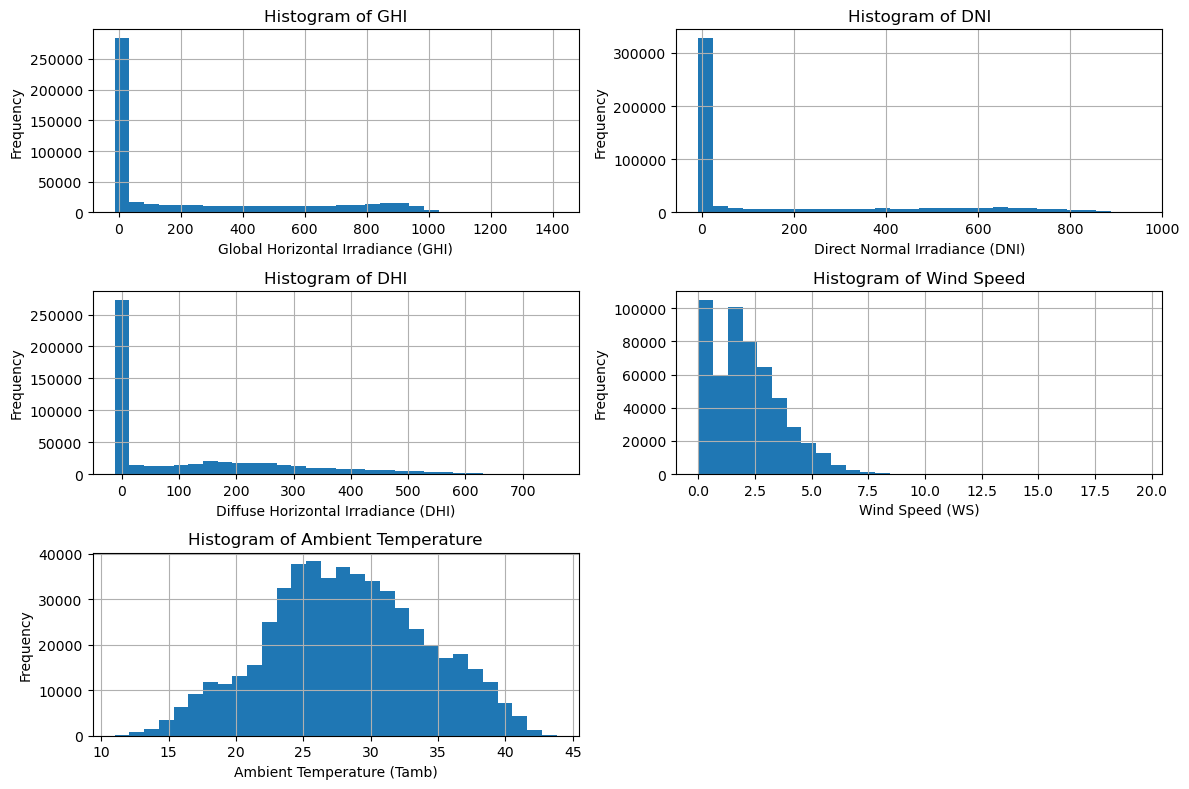

In [88]:
# Create histograms
plt.figure(figsize=(12, 8))

# Global Horizontal Irradiance (GHI)
plt.subplot(3, 2, 1)
df1['GHI'].hist(bins=30)
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')

# Direct Normal Irradiance (DNI)
plt.subplot(3, 2, 2)
df1['DNI'].hist(bins=30)
plt.xlabel('Direct Normal Irradiance (DNI)')
plt.ylabel('Frequency')
plt.title('Histogram of DNI')

# Diffuse Horizontal Irradiance (DHI)
plt.subplot(3, 2, 3)
df1['DHI'].hist(bins=30)
plt.xlabel('Diffuse Horizontal Irradiance (DHI)')
plt.ylabel('Frequency')
plt.title('Histogram of DHI')

# Wind Speed (WS)
plt.subplot(3, 2, 4)
df1['WS'].hist(bins=30)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed')

# Ambient Temperature (Tamb)
plt.subplot(3, 2, 5)
df1['Tamb'].hist(bins=30)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Frequency')
plt.title('Histogram of Ambient Temperature')

plt.tight_layout()
plt.show()